## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

## **Importing Dataset**

## *ScreenTime Analysis*

![Screen Time](screen-time-affects-childrens-behavior-and-development-870x570.png)

In [2]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\screentime_analysis_jan_2025.csv")

In [3]:
df.head(5)

,Date,App,Usage (minutes),Notifications,Times Opened
0,2025-01-01,Insta,120,11,38
1,2025-01-01,X,220,31,13
2,2025-01-01,WhatsA,126,65,89
3,2025-01-01,Telegram,60,5,14
4,2025-01-01,YouTube,120,2,10


## Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             240 non-null    object
 1   App              240 non-null    object
 2   Usage (minutes)  240 non-null    int64 
 3   Notifications    240 non-null    int64 
 4   Times Opened     240 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 9.5+ KB


In [5]:
df.shape

(240, 5)

In [6]:
df["Date"]=pd.to_datetime(df["Date"])

## Data Handling 

In [7]:
df.isna().sum()

Date               0
App                0
Usage (minutes)    0
Notifications      0
Times Opened       0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

## EDA & Visualization

In [9]:
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2025-01-01,Insta,120,11,38
1,2025-01-01,X,220,31,13
2,2025-01-01,WhatsA,126,65,89
3,2025-01-01,Telegram,60,5,14
4,2025-01-01,YouTube,120,2,10


In [10]:
classifi_us=df.groupby("App")["Usage (minutes)"].sum().reset_index().sort_values("Usage (minutes)",ascending=False)
classifi_us.style.background_gradient(cmap="Reds")


,App,Usage (minutes)
0,Facebook,5331
10,YouTube,4849
5,Telegram,4770
8,WhatsApp,4694
2,Instagram,4637
4,Netflix,4548
3,LinkedIn,4368
9,X,3900
7,WhatsA,532
1,Insta,483


#### *The above chart shows the most used application platform on the basis of how many minutes have been spent on them,*
#### *And the analysis shows that the Facebook is the most used platform after that there is Youtube, Telegram,Whatsapp and then Instagram.*

## The Barplot Visualization Of Showing The Most Used Platfrom 

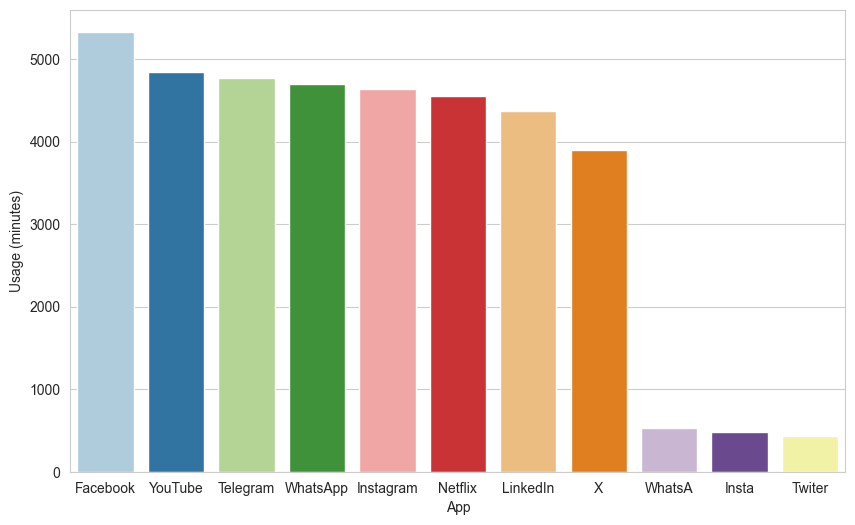

In [11]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_us,x="App",y="Usage (minutes)",hue="App",palette="Paired")
plt.show()

### ` Alternate Pie Visualization For Better Understanding`

In [12]:
import plotly.express as px
fig=px.pie(classifi_us,values="Usage (minutes)",names="App", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

## Classification Based On Notification Counts

In [13]:
classifi_noti=df.groupby("App")["Notifications"].sum().reset_index().sort_values("Notifications",ascending=False)
classifi_noti.style.background_gradient(cmap="Blues")

,App,Notifications
8,WhatsApp,3009
2,Instagram,1292
0,Facebook,1114
9,X,665
7,WhatsA,388
3,LinkedIn,237
5,Telegram,131
1,Insta,102
6,Twiter,91
10,YouTube,30


In [14]:
fig=px.bar(classifi_noti,x="App",y="Notifications",text_auto=".2s",color_discrete_sequence=px.colors.qualitative.Bold)
fig.show()

In [15]:
classifi_op=df.groupby("App")["Times Opened"].sum().reset_index().sort_values("Times Opened",ascending=False)
classifi_op.style.background_gradient(cmap="Oranges")

,App,Times Opened
8,WhatsApp,1869
2,Instagram,1035
0,Facebook,886
9,X,344
7,WhatsA,258
5,Telegram,255
10,YouTube,177
3,LinkedIn,144
1,Insta,96
4,Netflix,81


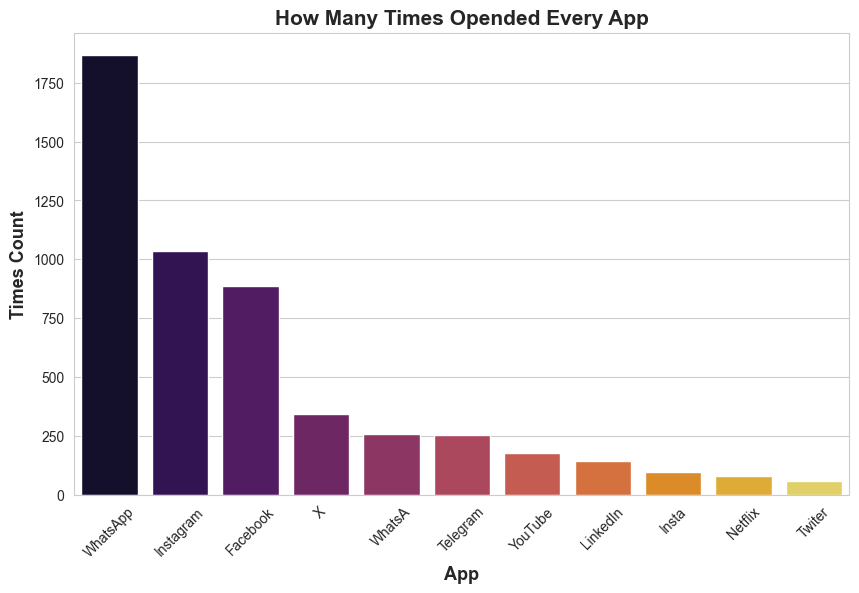

In [16]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_op,x="App",y='Times Opened',hue="App",palette="inferno")
plt.xticks(rotation=45)
plt.xlabel("App",fontsize=13,fontweight="bold")
plt.ylabel("Times Count",fontsize=13,fontweight="bold")
plt.title("How Many Times Opended Every App",fontsize=15,fontweight="bold")
plt.show()

In [17]:
classifi_date=df.groupby(["Date","App"])["Usage (minutes)"].sum().reset_index()
classifi_date.head(25).style.background_gradient(cmap="Reds")

,Date,App,Usage (minutes)
0,2025-01-01 00:00:00,Facebook,134
1,2025-01-01 00:00:00,Insta,120
2,2025-01-01 00:00:00,LinkedIn,70
3,2025-01-01 00:00:00,Netflix,147
4,2025-01-01 00:00:00,Telegram,60
5,2025-01-01 00:00:00,WhatsA,126
6,2025-01-01 00:00:00,X,220
7,2025-01-01 00:00:00,YouTube,120
8,2025-01-02 00:00:00,Facebook,140
9,2025-01-02 00:00:00,Instagram,80


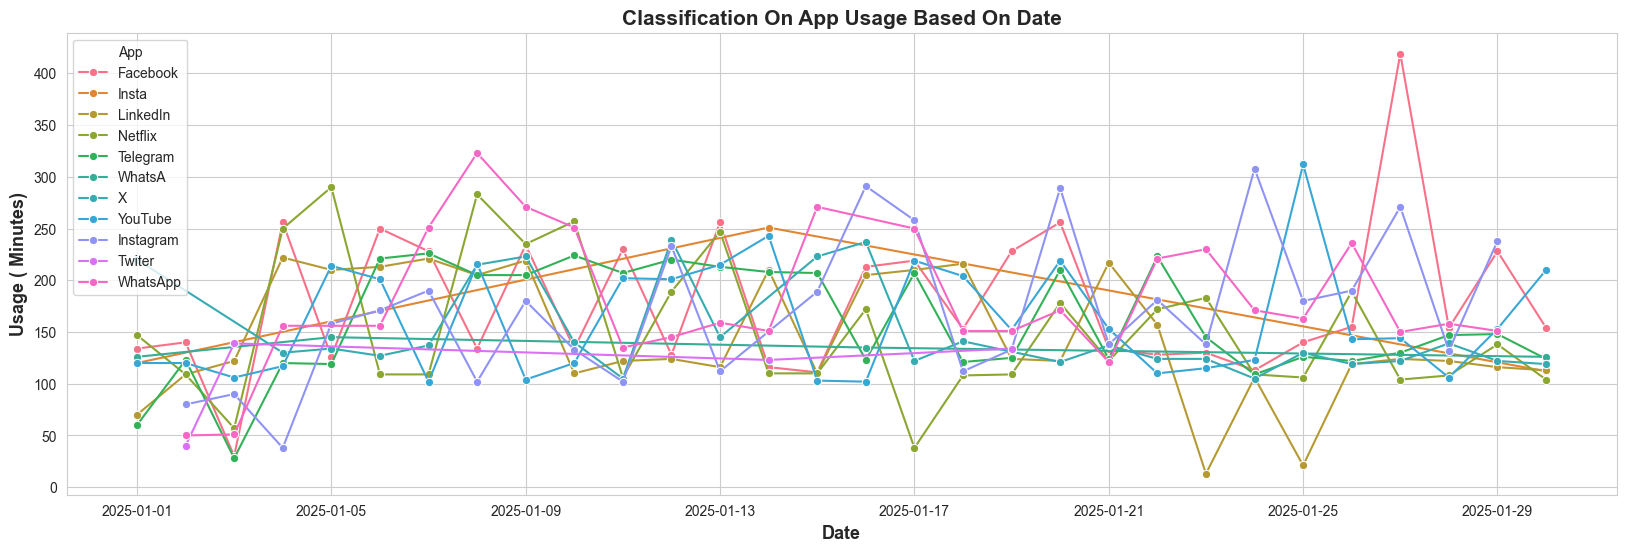

In [18]:
plt.figure(figsize=(20,6))
sns.set_style("whitegrid")
sns.lineplot(data=classifi_date,x="Date",y="Usage (minutes)",hue="App",marker="o")
plt.xlabel("Date",fontsize=13,fontweight="bold")
plt.ylabel("Usage ( Minutes)",fontsize=13,fontweight="bold")
plt.title("Classification On App Usage Based On Date",fontsize=15,fontweight="bold")
plt.show()

## Correlation Visualization 

Text(0.5, 1.0, 'Correlation Heatmap')

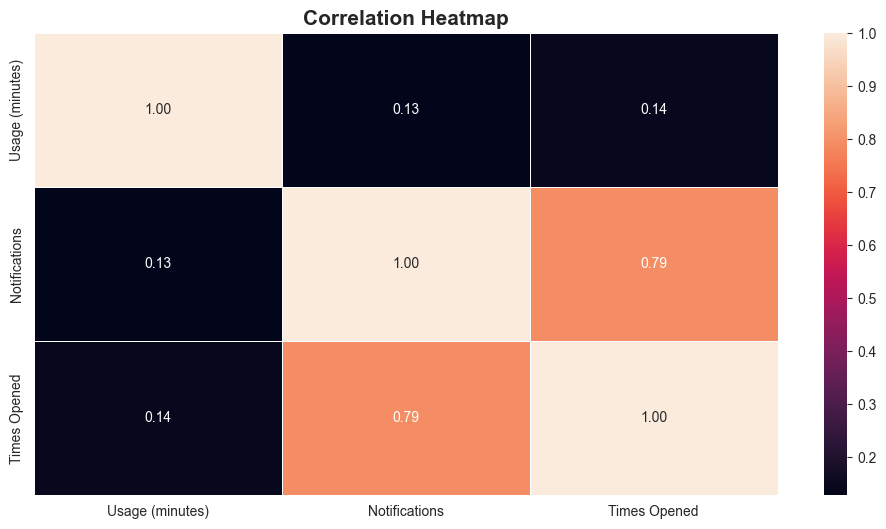

In [19]:
cor=df.corr(numeric_only=True)
plt.figure(figsize=(12,6))
sns.heatmap(cor,annot=True,fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap",fontsize=15,fontweight="bold")